<a href="https://colab.research.google.com/github/KaranTejwani/deep-learning-practise/blob/main/CNN_Based_Classification_of_Intel_Image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(150,150,3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,556,806 (21.20 MB)

 Trainable params: 5,556,806 (21.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_dir = '/content/drive/My Drive/datasets/intel_image_classification_small'

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical'
)

val_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical'
)

test_dataset = image_dataset_from_directory(
    base_dir+'/test',
    image_size=(150, 150),
    batch_size=32,
    label_mode = 'categorical'
)

Found 864 files belonging to 6 classes.
Using 600 files for training.
Found 864 files belonging to 6 classes.
Using 264 files for validation.
Found 600 files belonging to 6 classes.


In [8]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=32
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 256s 13s/step - accuracy: 0.1819 - loss: 1.8149 - val_accuracy: 0.3295 - val_loss: 1.6264
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.3576 - loss: 1.5116 - val_accuracy: 0.4545 - val_loss: 1.3238
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.4264 - loss: 1.3579 - val_accuracy: 0.5114 - val_loss: 1.2037
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.4850 - loss: 1.2106 - val_accuracy: 0.5114 - val_loss: 1.1782
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.5168 - loss: 1.1399 - val_accuracy: 0.5379 - val_loss: 1.1476
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.5139 - loss: 1.2448 - val_accuracy: 0.5947 - val_loss: 1.0271
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.6016 - loss: 1.0002 - val_accuracy: 0.5947 - val_loss: 1.0153
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.6213 - loss: 0.9463 - val_accuracy: 0.6174 - val_los

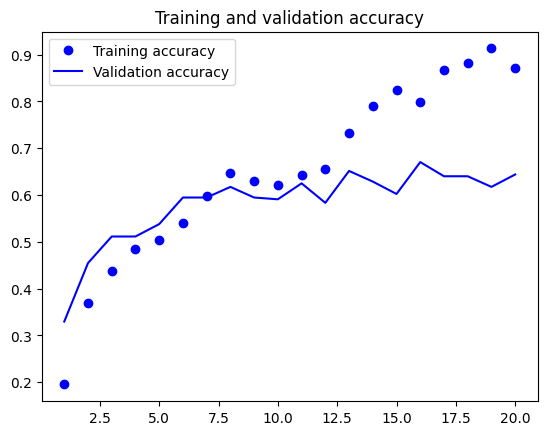

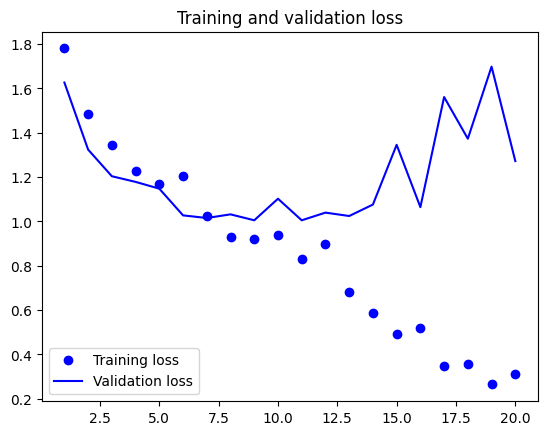

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 201s 10s/step - accuracy: 0.6206 - loss: 1.3242
Test accuracy: 0.602


In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),
    ]
)

In [12]:
inputs = keras.Input(shape=(150,150,3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=32
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.2260 - loss: 1.8627 - val_accuracy: 0.3636 - val_loss: 1.5433
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.3646 - loss: 1.5412 - val_accuracy: 0.4015 - val_loss: 1.4000
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.3884 - loss: 1.4222 - val_accuracy: 0.2803 - val_loss: 1.6066
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.4229 - loss: 1.3543 - val_accuracy: 0.4621 - val_loss: 1.2847
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.4569 - loss: 1.3452 - val_accuracy: 0.1970 - val_loss: 2.3518
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.3925 - loss: 1.4283 - val_accuracy: 0.4318 - val_loss: 1.4081
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.4186 - loss: 1.3120 - val_accuracy: 0.3447 - val_loss: 1.8617
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.4151 - loss: 1.3678 - val_accuracy: 0.3561 - val_loss:

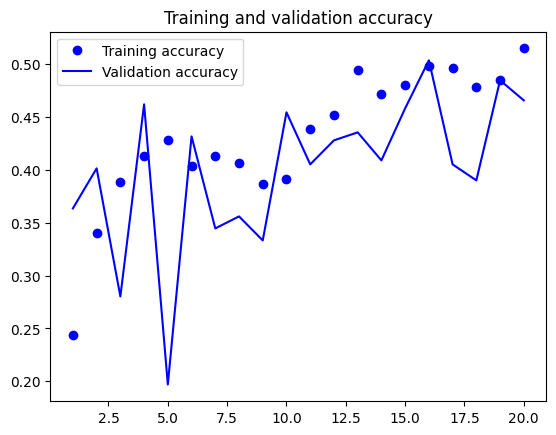

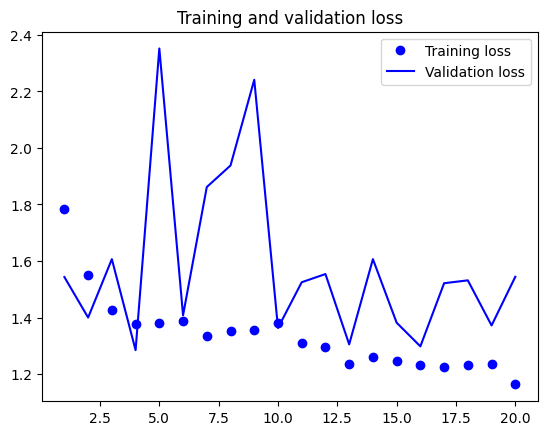

In [15]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 790ms/step - accuracy: 0.3865 - loss: 1.8200
Test accuracy: 0.398
